# Homework 3

In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from scipy.io.arff import loadarff
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error

### Load data

In [2]:
data = loadarff('../data/kin8nm.arff')
df = pd.DataFrame(data[0])

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

### Training-testing split

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3, random_state=0)

### Classifiers

In [4]:
classifiers = {'Ridge': Ridge(alpha=0.1),
               'MLP1': MLPRegressor(hidden_layer_sizes=(10, 10), activation='tanh', 
                                    max_iter=500, random_state=0, 
                                    early_stopping=True),
               'MLP2': MLPRegressor(hidden_layer_sizes=(10, 10), activation='tanh', 
                                    max_iter=500, random_state=0)}

### MAE

In [5]:
residuals = {}
for name in classifiers:
    classifiers[name].fit(X_train.values, y_train)
    y_pred = classifiers[name].predict(X_test.values)
    print(name, 'MAE:', mean_absolute_error(y_test, y_pred))
    residuals[name] = y_test - y_pred

Ridge MAE: 0.162829976437694
MLP1 MAE: 0.0680414073796843
MLP2 MAE: 0.0978071820387748


### Plot

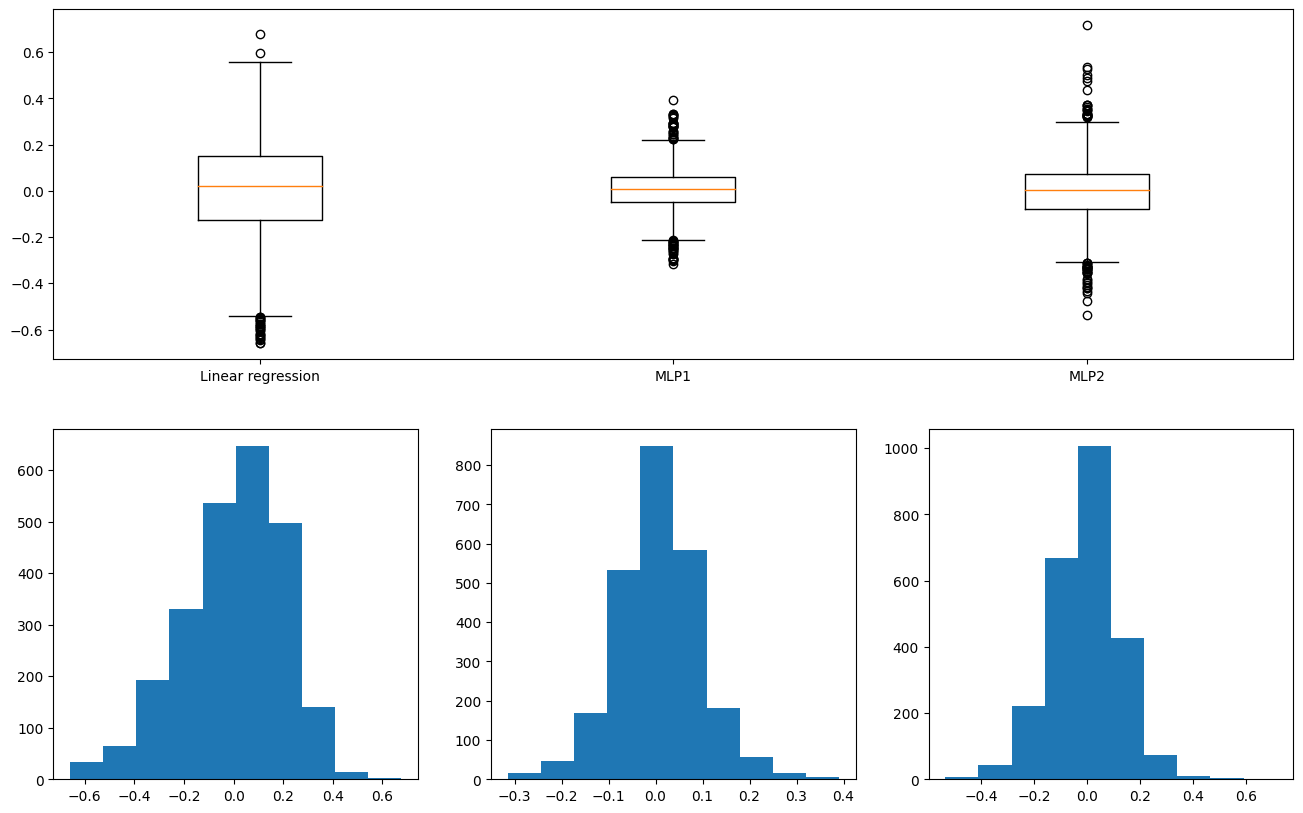

In [6]:
fig, axes = plt.subplot_mosaic("AAA;BCD")
fig.set_size_inches(16, 10)
axes['A'].boxplot([residuals['Ridge'], residuals['MLP1'], residuals['MLP2']],
                  labels=['Linear regression', 'MLP1', 'MLP2'])
axes['B'].hist(residuals['Ridge'])
axes['C'].hist(residuals['MLP1'])
axes['D'].hist(residuals['MLP2'])
plt.show()

### MLP Iterations

In [7]:
print('#Iterations MLP1:', classifiers['MLP1'].n_iter_)
print('#Iterations MLP2:', classifiers['MLP2'].n_iter_)

#Iterations MLP1: 452
#Iterations MLP2: 77
